# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [4]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

<font color=blue>Usualmente a mayor edad mayores ingresos, sin embargo se ha visto que está relacionado con más variables como el nivel educativo, el cargo, el sector laboral, entre otras.</font>
 
For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

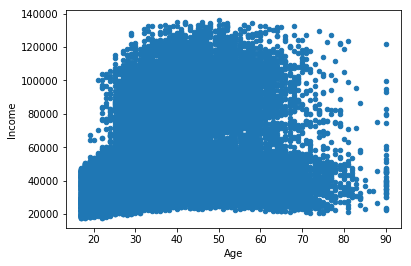

In [5]:
income.plot(x='Age', y='Income', kind='scatter')

In [6]:
##  Guardo las variables 

Y = income[['Income']].values
X = income[['Age']].values

In [10]:
## estimamos una correlacion para identificar si hay una asociación entre estas 2 variables
coefcor=np.corrcoef(income['Age'],income['Income'])
coefcor

array([[1.       , 0.2904083],
       [0.2904083, 1.       ]])

<font color=blue>No hay una asociación positiva ni negativa entre estas 2 variables por ende cuando aumenta en un 1% la edad no hay dependencia de un incremento porcentual en el ingreso.</font> 

In [11]:
## Se implementa el modelo
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
## Obtenemos los coeficientes y la ecuación de la recta
m = regressor.coef_[0]
b = regressor.intercept_
print(' y = {0} * x + {1}'.format(m, b))

 y = [542.16765707] * x + [32538.08813087]


In [13]:
## Realizamos la predición para las edades de 30 y 40 años
y_pred=regressor.predict(X)
Age=[[30],[40]]
Inc_pred = regressor.predict(Age)
Inc_pred

array([[48803.11784304],
       [54224.79441376]])

<font color=green> El ingreso estimado cuando se tiene una edad de 30 años es  48.803 dólares, mientras que un ingreso estimado cuando se tiene una edad de 40 años es  54.224 dólares</font>

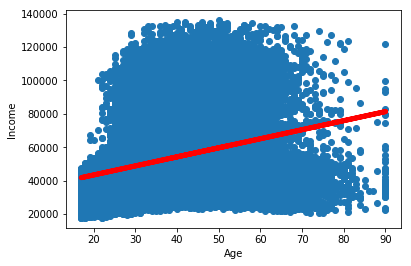

In [14]:
# scatter plot
plt.scatter(X, Y)

# Plot the linear regression
plt.plot(X, y_pred, 'r', lw=5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Exercise 4.2
Evaluate the model using the MSE

In [15]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

MSE: 593783043.8402299


<font color=green>Tenemos un MSE muy alto  y por lo que se puede observar en la gráfica anterior los datos no se ajustan a una línea recta </font>


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [45]:
## Ingresamos la  variable
income['Age2'] = income['Age'] ** 2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [17]:
## Se  crea una matriz con los datos las variables de interés en la regresión
MX2=income[['Age','Age2']].values

In [18]:
## Se aplica la regresión
linreg = LinearRegression(fit_intercept=False)
linreg.fit(MX2,Y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [19]:
##Podemos ver sus coeficientes de la edad y edad al cuadrado
linreg.coef_

array([[2346.62896328,  -21.97439239]])

In [20]:
## Alojamos el valor predicho de las variable respecto a la edad
y_pred2=linreg.predict(MX2)


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [21]:
##  Se quiere ver el desempeño con las siguientes variables Relationship,Race,Age,Workclass 
## Se tomaron porque tienen el menor número de categorías
income['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [22]:
## Convertimos las variables categoricas en dummies
income2= pd.get_dummies(data=income, columns=['Relationship', 'Race','Sex','Workclass'])
income2.columns

Index(['Age', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status',
       'Occupation', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'Country', 'Income', 'Age2', 'Relationship_Husband',
       'Relationship_Not-in-family', 'Relationship_Other-relative',
       'Relationship_Own-child', 'Relationship_Unmarried', 'Relationship_Wife',
       'Race_Amer-Indian-Eskimo', 'Race_Asian-Pac-Islander', 'Race_Black',
       'Race_Other', 'Race_White', 'Sex_Female', 'Sex_Male',
       'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay'],
      dtype='object')

In [23]:
## Materializamos nuestras variables explicativas que se van a ingresar a la regresion lineal

XMultiple=income2[['Age','Relationship_Husband',
       'Relationship_Not-in-family', 'Relationship_Other-relative',
       'Relationship_Own-child', 'Relationship_Unmarried', 'Relationship_Wife',
       'Race_Amer-Indian-Eskimo', 'Race_Asian-Pac-Islander', 'Race_Black',
       'Race_Other', 'Race_White', 'Sex_Female', 'Sex_Male',
       'Workclass_Federal-gov', 'Workclass_Local-gov',
       'Workclass_Never-worked', 'Workclass_Private', 'Workclass_Self-emp-inc',
       'Workclass_Self-emp-not-inc', 'Workclass_State-gov',
       'Workclass_Without-pay']].values

In [24]:
## implenta la regresión 
mullinreg = LinearRegression(fit_intercept=False)
mullinreg.fit(XMultiple,Y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [25]:
y_pred3=mullinreg.predict(XMultiple)

In [26]:
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred3))

MSE: 418733440.63176256


<font color=green> Aunque el desempeño del MSE se reduce y mejora respecto al MSE de solo edad, sigue indicando que hay bastante error entre los valores predichos y los reales que no se ajustan a una recta. </font>

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [46]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [47]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X,

What is the distribution of the churners?

<font color=green> El 14% de los clientes de la base desertaron.</font>

Split the data in train (70%) and test (30%)  


In [48]:
## Adicionar al dataframe una columna de tipo boleano Churn_Answer y efectivamente es boolean
data['Churn_Answer'] = (data['Churn?'] == 'True.')
data['Churn_Answer'].dtype

dtype('bool')

In [30]:
## validamos que se haya quedado la variale ok
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn_Answer
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


In [31]:
## Cantidad de registros de la base ( filas )
data.shape[0]

3333

In [50]:
## Detalle por nombre de las columnas
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'Churn_Answer'],
      dtype='object')

In [51]:
## Tipos de datos de las columnas
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
Churn_Answer         bool
dtype: object

In [55]:
## Se realizo un ejercicio de ver la columna estado y demás que tienen muchas categorías
data['Account Length'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 117, 141,  65,  74, 168,
        95,  62, 161,  85,  93,  76,  73,  77, 130, 111, 132, 174,  57,
        54,  20,  49, 142, 172,  12,  72,  36,  78, 136, 149,  98, 135,
        34, 160,  64,  59, 119,  97,  52,  60,  10,  96,  87,  81,  68,
       125, 116,  38,  40,  43, 113, 126, 150, 138, 162,  90,  50,  82,
       144,  46,  70,  55, 106,  94, 155,  80, 104,  99, 120, 108, 122,
       157, 103,  63, 112,  41, 193,  61,  92, 131, 163,  91, 127, 110,
       140,  83, 145,  56, 151, 139,   6, 115, 146, 185, 148,  32,  25,
       179,  67,  19, 170, 164,  51, 208,  53, 105,  66,  86,  35,  88,
       123,  45, 100, 215,  22,  33, 114,  24, 101, 143,  48,  71, 167,
        89, 199, 166, 158, 196, 209,  16,  39, 173, 129,  44,  79,  31,
       124,  37, 159, 194, 154,  21, 133, 224,  58,  11, 109, 102, 165,
        18,  30, 176,  47, 190, 152,  26,  69, 186, 171,  28, 153, 169,
        13,  27,   3,  42, 189, 156, 134, 243,  23,   1, 205, 20

In [56]:
##Se convierte el codigo de área y otras 2 variables en dummies

data2= pd.get_dummies(data=data, columns=['Area Code', "Int'l Plan",'VMail Plan'])
data2.columns

Index(['State', 'Account Length', 'Phone', 'VMail Message', 'Day Mins',
       'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?', 'Churn_Answer',
       'Area Code_408', 'Area Code_415', 'Area Code_510', 'Int'l Plan_no',
       'Int'l Plan_yes', 'VMail Plan_no', 'VMail Plan_yes'],
      dtype='object')

In [67]:
## Definimos las variables X Y
y = data['Churn_Answer'].values 
X=data2[['VMail Message', 'Day Mins',
        'Day Charge', 'Eve Mins',  'Eve Charge',
       'Night Mins',  'Night Charge', 'Intl Mins', 'Intl Charge', 'Area Code_408', 'Area Code_415', 'Area Code_510', "Int'l Plan_no", "Int'l Plan_yes",
       'VMail Plan_no', 'VMail Plan_yes']].values

In [68]:
## En una tabla calculamos el porcentaje de deserción de la base del 14%
func = lambda x: 100*x.count()/data.shape[0]
table=pd.pivot_table(data,  index=['Churn_Answer'], values='Day Calls', aggfunc=func)
table.columns = ['Percent']
table

,Percent
Churn_Answer,
False,85.508551
True,14.491449


In [69]:
## Asignamos el 70% para entrenamiento y el 30 % para test se deb

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_train, y_train)  

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [71]:
y_pred_log = logreg.predict(X_test) 

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [72]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log )
np.set_printoptions(precision=2)
print(cm)

[[848  14]
 [117  21]]


In [63]:
np.unique(y_test)

array([False,  True])

In [64]:
def plot_confusion_matrix(cm, title='Confusion matrix for Churn', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

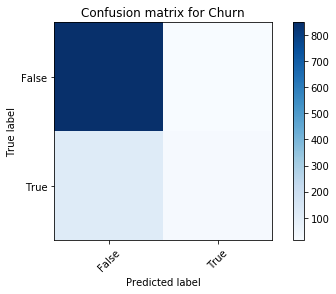

In [73]:
plt.figure()
plot_confusion_matrix(cm)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_log)

0.865